In [2]:
import pandas as pd
import numpy as np

In [3]:
reviews = pd.read_csv("/kaggle/input/amazon-books-reviews/Books_rating.csv")
books = pd.read_csv("/kaggle/input/amazon-books-reviews/books_data.csv")
authors = pd.read_csv("/kaggle/input/goodread-authors/final_dataset.csv")

In [31]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [211]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209517 entries, 0 to 209516
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   authorid           209517 non-null  int64  
 1   name               209517 non-null  object 
 2   workcount          209517 non-null  int64  
 3   fan_count          209517 non-null  int64  
 4   gender             209517 non-null  object 
 5   image_url          209517 non-null  object 
 6   about              86724 non-null   object 
 7   born               31230 non-null   object 
 8   died               12488 non-null   object 
 9   influence          7882 non-null    object 
 10  average_rate       209517 non-null  float64
 11  rating_count       209517 non-null  int64  
 12  review_count       209517 non-null  int64  
 13  website            58320 non-null   object 
 14  twitter            35122 non-null   object 
 15  genre              73983 non-null   object 
 16  or

In [4]:
print("books: ", len(books))
print("authors: ", len(authors))
print("reviews: ", len(reviews))

books:  212404
authors:  209517
reviews:  3000000


# Clean review dataset
- Exclude rows with missing User_id

In [4]:
reviews_keep = reviews[~reviews["User_id"].isna()].reset_index(drop=True)
reviews_keep

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...,...,...,...,...,...,...
2438208,B000NSLVCU,The Idea of History,NaN,AI1QNMVF2E3TN,"Robin George ""Master of Arts""",28/29,5.0,1057017600,R. G. Collingwood's Most Famous Book,Highly Recommended.This book is one of the bes...
2438209,B000NSLVCU,The Idea of History,NaN,AOFGOUMXLMVZS,"S. Grotzke ""scquest""",3/3,4.0,1342483200,Thoughtful Critic of History,History is not a scientific process of cutting...
2438210,B000NSLVCU,The Idea of History,NaN,A1SMUB9ASL5L9Y,jafrank,1/1,4.0,1331683200,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...
2438211,B000NSLVCU,The Idea of History,NaN,A2AQMEKZKK5EE4,"L. L. Poulos ""Muslim Mom""",0/0,4.0,1180224000,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i..."


## Keep only the latest review entries for each user on one book

In [5]:
review_unique = reviews_keep[["Title", "User_id", "review/time"]]
print(len(review_unique))
unique_idx = review_unique.drop_duplicates().index
print(len(unique_idx))
reviews_keep_ = reviews_keep.loc[unique_idx].reset_index(drop=True)
reviews_keep_

2438213
2130809


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...,...,...,...,...,...,...
2130804,B000NSLVCU,The Idea of History,NaN,AI1QNMVF2E3TN,"Robin George ""Master of Arts""",28/29,5.0,1057017600,R. G. Collingwood's Most Famous Book,Highly Recommended.This book is one of the bes...
2130805,B000NSLVCU,The Idea of History,NaN,AOFGOUMXLMVZS,"S. Grotzke ""scquest""",3/3,4.0,1342483200,Thoughtful Critic of History,History is not a scientific process of cutting...
2130806,B000NSLVCU,The Idea of History,NaN,A1SMUB9ASL5L9Y,jafrank,1/1,4.0,1331683200,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...
2130807,B000NSLVCU,The Idea of History,NaN,A2AQMEKZKK5EE4,"L. L. Poulos ""Muslim Mom""",0/0,4.0,1180224000,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i..."


In [6]:
review_ts = reviews_keep_[["Id", "Title", "User_id", "review/time"]]
idx = review_ts.groupby(["Title", "User_id"])["review/time"].transform(max) == reviews_keep_["review/time"]
reviews_keep__ = reviews_keep_[idx]
print(len(reviews_keep__))

2115811


In [8]:
bt_uid = reviews_keep__["Title"] + reviews_keep__["User_id"]
bt_uid.value_counts()

Its Only Art If Its Well Hung!AVCGYZL8FQQTD                       1
The NKJV Greek-English Interlinear New TestamentA2PZ5U900HO05Y    1
SMALL IS BEAUTIFULA3LWS1L674IYH7                                  1
SMALL IS BEAUTIFULA10ASLX7DTTB6Z                                  1
SMALL IS BEAUTIFULA2AA025TVY3077                                  1
                                                                 ..
CivilWarLand in Bad DeclineALV5O40LG06GH                          1
CivilWarLand in Bad DeclineA3K5V3ZJVI4L8                          1
CivilWarLand in Bad DeclineA132W3WHAG241Z                         1
CivilWarLand in Bad DeclineA3JLTNE97Z3DLB                         1
The Idea of HistoryA18SQGYBKS852K                                 1
Length: 2115811, dtype: int64

In [7]:
reviews_keep = reviews_keep__.reset_index(drop=True)
reviews_keep

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...,...,...,...,...,...,...
2115806,B000NSLVCU,The Idea of History,NaN,AI1QNMVF2E3TN,"Robin George ""Master of Arts""",28/29,5.0,1057017600,R. G. Collingwood's Most Famous Book,Highly Recommended.This book is one of the bes...
2115807,B000NSLVCU,The Idea of History,NaN,AOFGOUMXLMVZS,"S. Grotzke ""scquest""",3/3,4.0,1342483200,Thoughtful Critic of History,History is not a scientific process of cutting...
2115808,B000NSLVCU,The Idea of History,NaN,A1SMUB9ASL5L9Y,jafrank,1/1,4.0,1331683200,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...
2115809,B000NSLVCU,The Idea of History,NaN,A2AQMEKZKK5EE4,"L. L. Poulos ""Muslim Mom""",0/0,4.0,1180224000,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i..."


# Clean book dataset
- Explode authors column, remove rows with missing author
- Explode categories column

In [8]:
# Get authors
import re
book_authors = books["authors"].fillna("[]")
book_authors = book_authors.apply(lambda x: re.sub(r"['\[\]]", "", x).split(', '))
print(len(book_authors))
books["author"] = book_authors
book_authors = books.explode("author",ignore_index=True)

nan_idx = book_authors[book_authors["author"]==''].index
book_authors.drop(nan_idx, inplace=True)
book_authors

212404


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,author
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,Julie Strain
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,Philip Nel
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN,David R. Ray
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN,Veronica Haddon
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN,Edward Long
...,...,...,...,...,...,...,...,...,...,...,...
264093,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0,Elvira Woodruff
264095,Mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN,Wild Wild Cabbage
264096,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0,Zadie Smith
264097,Student's Solutions Manual for Johnson/Mowry's...,Discover the many ways mathematics is relevant...,"['David B. Johnson', 'Thomas A. Mowry']",http://books.google.com/books/content?id=dehfP...,http://books.google.com/books?id=dehfPgAACAAJ&...,Brooks/Cole Publishing Company,1998-01-01,http://books.google.com/books?id=dehfPgAACAAJ&...,NaN,NaN,David B. Johnson


In [ ]:
book_has_author_review = book_authors[(book_authors["author"].isin(authors["name"])) & (book_authors["Title"].isin(reviews_keep["Title"]))]
print(len(book_has_author_review))

book_genre = book_has_author_review["categories"].fillna("[]")
book_genre = book_genre.apply(lambda x: re.sub(" & ", ", ", x.lower().strip("']['")).split(", "))
book_has_author_review["genre"] = book_genre
book_author_genre = book_has_author_review.explode("genre", ignore_index=True)
book_author_genre

# Clean review dataset again

In [12]:
reviews_keep_v2 = reviews_keep[reviews_keep["Title"].isin(book_author_genre["Title"])]
print(len(reviews_keep_v2))
reviews_keep_v2

1264781


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
47,0802841899,The Church of Christ: A Biblical Ecclesiology ...,25.97,ARI272XF8TOL4,Christopher J. Bray,74/81,5.0,955411200,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...
48,0802841899,The Church of Christ: A Biblical Ecclesiology ...,25.97,A36TPZSH8LBT1,haskell,2/3,5.0,1311465600,Early Christian development of the Church,Everett Ferguson approaches the subject of ear...
49,0802841899,The Church of Christ: A Biblical Ecclesiology ...,25.97,ANX3DDV12ZRRU,GodsBreath.wordpress,2/3,4.0,1289952000,An Excellent Presentation of the Beliefs of th...,This book is a continual resource. It is so bi...
50,0802841899,The Church of Christ: A Biblical Ecclesiology ...,25.97,A2H2LORTA5EZY2,Edward E. Howe,3/5,4.0,1266192000,Christ is Lord,This is a very useful and thorough text book. ...
52,B000JINSBG,A Walk in the Woods: a Play in Two Acts,NaN,A15A5KPP3AL76U,Vinny Wolf,0/0,5.0,1361491200,meaty and fast,"This play was excellent. It's very smart, inte..."
...,...,...,...,...,...,...,...,...,...,...
2115800,B000NSGW7E,Ghost Story,NaN,ASLHDTUUMOH7F,"Gregory E. Foster ""operabruin""",3/7,5.0,1184284800,BENCHMARK TERROR of the highest sort!!!,"1979 it was, I believe, when I became first ac..."
2115801,B000NSGW7E,Ghost Story,NaN,APED18EB6YA02,Nicholas Pfeiffer,0/4,5.0,1264982400,Great deal. thanks for the quick ship.,So far it is a really good book. I was very ha...
2115802,B000NSGW7E,Ghost Story,NaN,A9Z9ETUI48IVC,Bill F. Mccann Jr.,0/4,5.0,1258243200,Shivers me timbers!!!!!,"The best ""ghost story"" I've ever read. Don't b..."
2115803,B000NSGW7E,Ghost Story,NaN,APW0VLW2NWO98,Kim Klein,0/4,5.0,1240963200,Great Transactions!,It was a great transaction! The book was descr...


# Clean author dataset

In [13]:
author_has_book = authors[authors["name"].isin(book_has_author_review["author"])]
print(len(author_has_book))

author_genre = author_has_book["genre"].fillna("")
author_genre = author_genre.apply(lambda x: re.sub(" and ", ",", x).split(","))
author_has_book["one_genre"] = author_genre
author_genre = author_has_book.explode("one_genre",ignore_index=True)
author_genre

35577


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,authorid,name,workcount,fan_count,gender,image_url,about,born,died,influence,...,rating_count,review_count,website,twitter,genre,original_hometown,country,latitude,longitude,one_genre
0,181738,Louise Hall Tharp,10,1,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,...,309,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,236030,Richard Reinhardt,9,0,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,...,30,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,64005,Robert W. Gutman,4,0,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,...,164,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,107277,Alexander Steele,20,5,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,...,2284,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,8375,Keith Roberts,118,24,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"Used These Alternate Names: Alistair Bevan , J...",1935-09-20,2000-10-05,NaN,...,5402,552,NaN,NaN,"fantasy,fiction","Northamptonshire, England",United Kingdom,52.25000,-0.88333,fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61494,35848,Manda Scott,21,451,female,https://images.gr-assets.com/authors/125516895...,"Novelist, columnist, blogger, podcaster, broad...",NaN,NaN,"Hilary Mantel,Mary Renault,Rosemary Sutcliff,",...,11936,1029,https://mandascott.co.uk,MandaScott,"history,mystery and thrillers",Scotland,United Kingdom,56.00000,-4.00000,thrillers
61495,71311,Amy Belding Brown,4,130,female,https://images.gr-assets.com/authors/141425738...,"Amy Belding Brown, a graduate of Bates College...",1947-08-25,NaN,NaN,...,9505,1216,http://amybeldingbrown.com,NaN,history,NaN,NaN,NaN,NaN,history
61496,67759,Rosanne Bittner,75,482,female,https://images.gr-assets.com/authors/142798670...,I am a USA-TODAY best-selling authors with 35 ...,NaN,NaN,NaN,...,13066,1310,http://www.rosannebittner.com,RosanneBittner,"history,romance","LaPorte, Indiana",United States,41.70754,-86.89503,history
61497,67759,Rosanne Bittner,75,482,female,https://images.gr-assets.com/authors/142798670...,I am a USA-TODAY best-selling authors with 35 ...,NaN,NaN,NaN,...,13066,1310,http://www.rosannebittner.com,RosanneBittner,"history,romance","LaPorte, Indiana",United States,41.70754,-86.89503,romance


## Create genre table

In [14]:
book_genre_counts = book_author_genre["genre"].apply(lambda x: x if len(x)<=25 else np.nan).value_counts()
author_genre_counts = author_genre["one_genre"].apply(lambda x: x if len(x)<=25 else np.nan).value_counts()

In [15]:
book_genre_keep = book_genre_counts[book_genre_counts > 5]
author_genre_keep = author_genre_counts[author_genre_counts > 5]

In [16]:
book_author_genre["genre"] = book_author_genre["genre"].apply(lambda x: x.lower() if x in book_genre_keep else "")
author_genre["one_genre"] = author_genre["one_genre"].apply(lambda x: x.lower() if x in author_genre_keep else "")

In [17]:
genre = pd.concat([author_genre["one_genre"], book_author_genre["genre"]], ignore_index=True)
genre.drop(labels=genre[genre==""].index, inplace=True)
genres_counts = genre.value_counts()
genre.reset_index(drop=True, inplace=True)
genre.drop_duplicates(inplace=True)
genre.sort_values(ascending=True, inplace=True)
genre.reset_index(drop=True, inplace=True)
genre

0      "children's literature"
1           "children's poetry
2          "children's poetry"
3           "children's songs"
4          "children's stories
                ...           
542                  world war
543                       yoga
544                young adult
545        young adult fiction
546     young adult nonfiction
Length: 547, dtype: object

In [18]:
genre = pd.DataFrame(genre, columns=["name"])
genre["index"] = genre.index
# genre_id = genre["index"].apply(lambda x: str(x).zfill(5-len(str(x))))
genre_id = genre["index"].apply(lambda x: x+1000)
genre["id"] = genre_id
genre = genre[["id", "name"]]
genre

,id,name
0,1000,"""children's literature"""
1,1001,"""children's poetry"
2,1002,"""children's poetry"""
3,1003,"""children's songs"""
4,1004,"""children's stories"
...,...,...
542,1542,world war
543,1543,yoga
544,1544,young adult
545,1545,young adult fiction


# Create user table

In [271]:
# users = reviews_keep_v2[["User_id", "profileName"]].drop_duplicates().reset_index(drop=True)
# users

,User_id,profileName
0,ARI272XF8TOL4,Christopher J. Bray
1,A36TPZSH8LBT1,haskell
2,ANX3DDV12ZRRU,GodsBreath.wordpress
3,A2H2LORTA5EZY2,Edward E. Howe
4,A15A5KPP3AL76U,Vinny Wolf
...,...,...
635463,A1XJWXF9LDFSL0,Hwang
635464,APED18EB6YA02,Nicholas Pfeiffer
635465,A9Z9ETUI48IVC,Bill F. Mccann Jr.
635466,APW0VLW2NWO98,Kim Klein


In [17]:
users_ = reviews[["User_id", "profileName"]].drop_duplicates().reset_index(drop=True)
users_

,User_id,profileName
0,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz"""
1,A30TK6U7DNS82R,Kevin Killian
2,A3UH4UZ4RSVO82,John Granger
3,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher"""
4,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore"""
...,...,...
1009372,A9Z9ETUI48IVC,Bill F. Mccann Jr.
1009373,APW0VLW2NWO98,Kim Klein
1009374,AD74ICXKB2O0B,James Janiesch
1009375,A2AQMEKZKK5EE4,"L. L. Poulos ""Muslim Mom"""


In [18]:
users_id = users_["User_id"].drop_duplicates().index

In [20]:
users_ = users_.iloc[users_id]

In [22]:
users_.reset_index(drop=True, inplace=True)

# Remove authors with multiple entries in the original dataset 

In [20]:
remove_authorid = [6601054,19520741, 8126837, 53512, 6854274]
author_genre_keep = author_genre[~author_genre["authorid"].isin(remove_authorid)].reset_index(drop=True)
author_genre_keep

,authorid,name,workcount,fan_count,gender,image_url,about,born,died,influence,...,rating_count,review_count,website,twitter,genre,original_hometown,country,latitude,longitude,one_genre
0,181738,Louise Hall Tharp,10,1,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,...,309,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,236030,Richard Reinhardt,9,0,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,...,30,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,64005,Robert W. Gutman,4,0,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,...,164,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,107277,Alexander Steele,20,5,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,...,2284,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,8375,Keith Roberts,118,24,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"Used These Alternate Names: Alistair Bevan , J...",1935-09-20,2000-10-05,NaN,...,5402,552,NaN,NaN,"fantasy,fiction","Northamptonshire, England",United Kingdom,52.25000,-0.88333,fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61489,35848,Manda Scott,21,451,female,https://images.gr-assets.com/authors/125516895...,"Novelist, columnist, blogger, podcaster, broad...",NaN,NaN,"Hilary Mantel,Mary Renault,Rosemary Sutcliff,",...,11936,1029,https://mandascott.co.uk,MandaScott,"history,mystery and thrillers",Scotland,United Kingdom,56.00000,-4.00000,thrillers
61490,71311,Amy Belding Brown,4,130,female,https://images.gr-assets.com/authors/141425738...,"Amy Belding Brown, a graduate of Bates College...",1947-08-25,NaN,NaN,...,9505,1216,http://amybeldingbrown.com,NaN,history,NaN,NaN,NaN,NaN,history
61491,67759,Rosanne Bittner,75,482,female,https://images.gr-assets.com/authors/142798670...,I am a USA-TODAY best-selling authors with 35 ...,NaN,NaN,NaN,...,13066,1310,http://www.rosannebittner.com,RosanneBittner,"history,romance","LaPorte, Indiana",United States,41.70754,-86.89503,history
61492,67759,Rosanne Bittner,75,482,female,https://images.gr-assets.com/authors/142798670...,I am a USA-TODAY best-selling authors with 35 ...,NaN,NaN,NaN,...,13066,1310,http://www.rosannebittner.com,RosanneBittner,"history,romance","LaPorte, Indiana",United States,41.70754,-86.89503,romance


# Verify linkage between three datasets
- Every book has reviews
- Every review belongs to a book
- Every book has authors
- Every author writes books

In [21]:
print("Books: ", len(book_author_genre))
print("Authors: ", len(author_genre_keep))
print("Reviews: ", len(reviews_keep_v2))
print("")

Books:  97265
Authors:  61494
Reviews:  1264781


In [22]:
print(len(book_author_genre[book_author_genre["Title"].isin(reviews_keep_v2["Title"])]))
print(len(reviews_keep_v2[reviews_keep_v2["Title"].isin(book_author_genre["Title"])]))
print(len(book_author_genre[book_author_genre["author"].isin(author_genre_keep["name"])]))
print(len(author_genre_keep[author_genre_keep["name"].isin(book_author_genre["author"])]))

97265
1264781
97265
61494


# Get book id from reviews

In [23]:
bookids = reviews_keep_v2[["Id", "Title"]].drop_duplicates().reset_index(drop=True)
print(bookids)
# bookid_author_genre = book

               Id                                              Title
0      0802841899  The Church of Christ: A Biblical Ecclesiology ...
1      B000JINSBG            A Walk in the Woods: a Play in Two Acts
2      B000879GGE                               A husband for Kutani
3      0908968000                                Gold and greenstone
4      0553763121  Overcoming Hypertension (Dr. Kenneth H. Cooper...
...           ...                                                ...
78709  0425200736                         Echoes (Berkley Sensation)
78710  B000O00U1K                               The Saint in England
78711  B000J58DB4        Galatians: The Charter of Christian Liberty
78712  0268008434       The Death of al-Hallaj: A Dramatic Narrative
78713  B000NSGW7E                                        Ghost Story

[78714 rows x 2 columns]


In [24]:
assert len(book_author_genre[book_author_genre["Title"].isin(bookids["Title"])]) == len(book_author_genre), "Row numbers do not match!"

In [25]:
bookid_author_genre = bookids.merge(book_author_genre, how="inner", on="Title")
bookid_author_genre

,Id,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,author,genre
0,0802841899,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,Everett Ferguson,religion
1,B000JINSBG,A Walk in the Woods: a Play in Two Acts,NaN,['Lee Blessing'],NaN,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,1988,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,3.0,Lee Blessing,
2,B000879GGE,A husband for Kutani,"First published in 1938, this is a collection ...",['Frank Owen'],http://books.google.com/books/content?id=EzxOD...,http://books.google.nl/books?id=EzxODwAAQBAJ&p...,Pickle Partners Publishing,2018-02-27,https://play.google.com/store/books/details?id...,['History'],NaN,Frank Owen,history
3,0908968000,Gold and greenstone,Sally did most things better than men but it w...,['Barry Crump'],NaN,http://books.google.nl/books?id=I5NOAQAACAAJ&d...,NaN,2009,http://books.google.nl/books?id=I5NOAQAACAAJ&d...,['New Zealand fiction'],NaN,Barry Crump,
4,0553763121,Overcoming Hypertension (Dr. Kenneth H. Cooper...,"Like a time bomb ticking away, hypertension bu...",['Kenneth H. Cooper'],http://books.google.com/books/content?id=guP-e...,http://books.google.nl/books?id=guP-e8igrK0C&p...,Bantam,2012-02-01,https://play.google.com/store/books/details?id...,['Health & Fitness'],NaN,Kenneth H. Cooper,health
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98844,0425200736,Echoes (Berkley Sensation),"Grace Peterson is desperate, in hiding, and on...",['Maya Banks'],http://books.google.com/books/content?id=UhKBE...,http://books.google.nl/books?id=UhKBE5pYC-wC&p...,Penguin,2012-07-03,https://play.google.com/store/books/details?id...,['Fiction'],13.0,Maya Banks,fiction
98845,B000O00U1K,The Saint in England,NaN,['Leslie Charteris'],NaN,http://books.google.nl/books?id=E4gLngEACAAJ&d...,NaN,1934,http://books.google.nl/books?id=E4gLngEACAAJ&d...,NaN,NaN,Leslie Charteris,
98846,B000J58DB4,Galatians: The Charter of Christian Liberty,To attain a full comprehension of the scriptur...,['Merrill C. Tenney'],http://books.google.com/books/content?id=jmK9e...,http://books.google.nl/books?id=jmK9egOpfn0C&p...,Wm. B. Eerdmans Publishing,1989,http://books.google.nl/books?id=jmK9egOpfn0C&d...,['Religion'],1.0,Merrill C. Tenney,religion
98847,0268008434,The Death of al-Hallaj: A Dramatic Narrative,Although not widely known in the Western world...,['Herbert Mason'],http://books.google.com/books/content?id=MQNaA...,http://books.google.nl/books?id=MQNaAAAAMAAJ&q...,NaN,1979,http://books.google.nl/books?id=MQNaAAAAMAAJ&d...,['Fiction'],1.0,Herbert Mason,fiction


# Merge tables

In [26]:
books_df = bookid_author_genre # book_author_genre
authors_df = author_genre_keep
reviews_df = reviews_keep_v2.reset_index(drop=True)
genre_df = genre

In [27]:
# Get author id for each book
author_ids_df = authors_df[["authorid", "name"]].drop_duplicates().reset_index(drop=True)
books_ai = books_df.merge(author_ids_df, how="inner", left_on="author", right_on="name")
books_ai

,Id,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,author,genre,authorid,name
0,0802841899,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,Everett Ferguson,religion,54416,Everett Ferguson
1,B000JINSBG,A Walk in the Woods: a Play in Two Acts,NaN,['Lee Blessing'],NaN,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,1988,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,3.0,Lee Blessing,,6398,Lee Blessing
2,B0006EZQDQ,Fortinbras,"THE STORY: Young Fortinbras, a modern man of a...",['Lee Blessing'],http://books.google.com/books/content?id=-s8ZY...,http://books.google.com/books?id=-s8ZYiMmKesC&...,Dramatists Play Service Inc,1992,http://books.google.com/books?id=-s8ZYiMmKesC&...,['Drama'],4.0,Lee Blessing,drama,6398,Lee Blessing
3,B000879GGE,A husband for Kutani,"First published in 1938, this is a collection ...",['Frank Owen'],http://books.google.com/books/content?id=EzxOD...,http://books.google.nl/books?id=EzxODwAAQBAJ&p...,Pickle Partners Publishing,2018-02-27,https://play.google.com/store/books/details?id...,['History'],NaN,Frank Owen,history,176964,Frank Owen
4,0908968000,Gold and greenstone,Sally did most things better than men but it w...,['Barry Crump'],NaN,http://books.google.nl/books?id=I5NOAQAACAAJ&d...,NaN,2009,http://books.google.nl/books?id=I5NOAQAACAAJ&d...,['New Zealand fiction'],NaN,Barry Crump,,60519,Barry Crump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98844,B000PGDMU4,Seducing Spirits and Doctrines of Demons,"These teachings may sound spiritual, but they ...",['Rick Renner'],http://books.google.com/books/content?id=G9_ZA...,http://books.google.nl/books?id=G9_ZAAAACAAJ&d...,Teach All Nations,1988,http://books.google.nl/books?id=G9_ZAAAACAAJ&d...,['Demonology'],NaN,Rick Renner,,161502,Rick Renner
98845,0500279004,Jane Austen in Style,The broader Regency period 1795-1820 stands al...,['Sarah Jane Downing'],http://books.google.com/books/content?id=nrI2v...,http://books.google.nl/books?id=nrI2vgAACAAJ&d...,Shire Publications,2010-03-23,http://books.google.nl/books?id=nrI2vgAACAAJ&d...,['Antiques & Collectibles'],1.0,Sarah Jane Downing,antiques,6879503,Sarah Jane Downing
98846,0500279004,Jane Austen in Style,The broader Regency period 1795-1820 stands al...,['Sarah Jane Downing'],http://books.google.com/books/content?id=nrI2v...,http://books.google.nl/books?id=nrI2vgAACAAJ&d...,Shire Publications,2010-03-23,http://books.google.nl/books?id=nrI2vgAACAAJ&d...,['Antiques & Collectibles'],1.0,Sarah Jane Downing,collectibles,6879503,Sarah Jane Downing
98847,0415123259,The Handbook of Communication Skills,The Handbook of Communication Skills is recogn...,['Owen Hargie'],http://books.google.com/books/content?id=DtQqB...,http://books.google.nl/books?id=DtQqBgAAQBAJ&p...,Routledge,2006-10-16,http://books.google.nl/books?id=DtQqBgAAQBAJ&d...,['Psychology'],NaN,Owen Hargie,psychology,955565,Owen Hargie


In [28]:
# Get genre id for each genre for each book
book_ai_gi = books_ai.merge(genre_df, how="left", left_on="genre", right_on="name")
book_ai_gi

,Id,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,author,genre,authorid,name_x,id,name_y
0,0802841899,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,Everett Ferguson,religion,54416,Everett Ferguson,1476.0,religion
1,B000JINSBG,A Walk in the Woods: a Play in Two Acts,NaN,['Lee Blessing'],NaN,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,1988,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,3.0,Lee Blessing,,6398,Lee Blessing,NaN,NaN
2,B0006EZQDQ,Fortinbras,"THE STORY: Young Fortinbras, a modern man of a...",['Lee Blessing'],http://books.google.com/books/content?id=-s8ZY...,http://books.google.com/books?id=-s8ZYiMmKesC&...,Dramatists Play Service Inc,1992,http://books.google.com/books?id=-s8ZYiMmKesC&...,['Drama'],4.0,Lee Blessing,drama,6398,Lee Blessing,1227.0,drama
3,B000879GGE,A husband for Kutani,"First published in 1938, this is a collection ...",['Frank Owen'],http://books.google.com/books/content?id=EzxOD...,http://books.google.nl/books?id=EzxODwAAQBAJ&p...,Pickle Partners Publishing,2018-02-27,https://play.google.com/store/books/details?id...,['History'],NaN,Frank Owen,history,176964,Frank Owen,1331.0,history
4,0908968000,Gold and greenstone,Sally did most things better than men but it w...,['Barry Crump'],NaN,http://books.google.nl/books?id=I5NOAQAACAAJ&d...,NaN,2009,http://books.google.nl/books?id=I5NOAQAACAAJ&d...,['New Zealand fiction'],NaN,Barry Crump,,60519,Barry Crump,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98844,B000PGDMU4,Seducing Spirits and Doctrines of Demons,"These teachings may sound spiritual, but they ...",['Rick Renner'],http://books.google.com/books/content?id=G9_ZA...,http://books.google.nl/books?id=G9_ZAAAACAAJ&d...,Teach All Nations,1988,http://books.google.nl/books?id=G9_ZAAAACAAJ&d...,['Demonology'],NaN,Rick Renner,,161502,Rick Renner,NaN,NaN
98845,0500279004,Jane Austen in Style,The broader Regency period 1795-1820 stands al...,['Sarah Jane Downing'],http://books.google.com/books/content?id=nrI2v...,http://books.google.nl/books?id=nrI2vgAACAAJ&d...,Shire Publications,2010-03-23,http://books.google.nl/books?id=nrI2vgAACAAJ&d...,['Antiques & Collectibles'],1.0,Sarah Jane Downing,antiques,6879503,Sarah Jane Downing,1057.0,antiques
98846,0500279004,Jane Austen in Style,The broader Regency period 1795-1820 stands al...,['Sarah Jane Downing'],http://books.google.com/books/content?id=nrI2v...,http://books.google.nl/books?id=nrI2vgAACAAJ&d...,Shire Publications,2010-03-23,http://books.google.nl/books?id=nrI2vgAACAAJ&d...,['Antiques & Collectibles'],1.0,Sarah Jane Downing,collectibles,6879503,Sarah Jane Downing,1174.0,collectibles
98847,0415123259,The Handbook of Communication Skills,The Handbook of Communication Skills is recogn...,['Owen Hargie'],http://books.google.com/books/content?id=DtQqB...,http://books.google.nl/books?id=DtQqBgAAQBAJ&p...,Routledge,2006-10-16,http://books.google.nl/books?id=DtQqBgAAQBAJ&d...,['Psychology'],NaN,Owen Hargie,psychology,955565,Owen Hargie,1470.0,psychology


In [29]:
# Get genre id for each genre for each author
author_gi = authors_df.merge(genre_df, how="left", left_on="one_genre", right_on="name")
author_gi

,authorid,name_x,workcount,fan_count,gender,image_url,about,born,died,influence,...,website,twitter,genre,original_hometown,country,latitude,longitude,one_genre,id,name_y
0,181738,Louise Hall Tharp,10,1,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN
1,236030,Richard Reinhardt,9,0,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN
2,64005,Robert W. Gutman,4,0,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN
3,107277,Alexander Steele,20,5,unknown,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN
4,8375,Keith Roberts,118,24,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"Used These Alternate Names: Alistair Bevan , J...",1935-09-20,2000-10-05,NaN,...,NaN,NaN,"fantasy,fiction","Northamptonshire, England",United Kingdom,52.25000,-0.88333,fantasy,1277.0,fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61489,35848,Manda Scott,21,451,female,https://images.gr-assets.com/authors/125516895...,"Novelist, columnist, blogger, podcaster, broad...",NaN,NaN,"Hilary Mantel,Mary Renault,Rosemary Sutcliff,",...,https://mandascott.co.uk,MandaScott,"history,mystery and thrillers",Scotland,United Kingdom,56.00000,-4.00000,thrillers,1526.0,thrillers
61490,71311,Amy Belding Brown,4,130,female,https://images.gr-assets.com/authors/141425738...,"Amy Belding Brown, a graduate of Bates College...",1947-08-25,NaN,NaN,...,http://amybeldingbrown.com,NaN,history,NaN,NaN,NaN,NaN,history,1331.0,history
61491,67759,Rosanne Bittner,75,482,female,https://images.gr-assets.com/authors/142798670...,I am a USA-TODAY best-selling authors with 35 ...,NaN,NaN,NaN,...,http://www.rosannebittner.com,RosanneBittner,"history,romance","LaPorte, Indiana",United States,41.70754,-86.89503,history,1331.0,history
61492,67759,Rosanne Bittner,75,482,female,https://images.gr-assets.com/authors/142798670...,I am a USA-TODAY best-selling authors with 35 ...,NaN,NaN,NaN,...,http://www.rosannebittner.com,RosanneBittner,"history,romance","LaPorte, Indiana",United States,41.70754,-86.89503,romance,1480.0,romance


## Replace missing book cover picture with a blank one

In [30]:
book_ai_gi["image"] = book_ai_gi["image"].fillna("https://libribook.com/Images/get-guy-learn-secrets-male-mind-find-man-want-love-deserve-pdf.jpg")

In [31]:
# Can a user write multiple reviews for one book? No
bid_uid = reviews_df["Id"] + reviews_df["User_id"]
print(len(bid_uid))
bid_uid.value_counts()

1264781


0802841899ARI272XF8TOL4            1
B000OUK3NUA19JHNBY89KQGS           1
B000OUK3NUAQ5U94Z6ZV7B1            1
B000OUK3NUA082372033N9BRN1FCHDI    1
B000OUK3NUACKAFEVT750XA            1
                                  ..
0801022762A2BYE83IVP4UCT           1
0801022762A21SGIUUT7QPR3           1
0801022762A2MBR21LUD4P40           1
0801022762A40YXFKKB5S6X            1
B000NSGW7EAD74ICXKB2O0B            1
Length: 1264781, dtype: int64

In [34]:
author_gi["country"].value_counts()

United States                               15466
United Kingdom                               4441
Canada                                        818
France                                        673
Germany                                       631
                                            ...  
Saudi Arabia                                    1
Yemen                                           1
Lesotho                                         1
South Georgia and South Sandwich Islands        1
Samoa                                           1
Name: country, Length: 147, dtype: int64

# Create tables to populate database

In [35]:
Book = book_ai_gi[["Id","Title", "description", "image", "previewLink", "publisher", "publishedDate"]].drop_duplicates(ignore_index=True)
Book.rename(columns={"Id": "book_id", "Title": "title"}, inplace=True)
Author = author_gi[["authorid", "name_x", "fan_count", "image_url", "about", "average_rate", "rating_count", "review_count", "website", "country"]].drop_duplicates(ignore_index=True)
Author.rename(columns={"authorid": "author_id", "name_x": "name"}, inplace=True)
User = users_.rename(columns={"User_id": "user_id"})
Genre = genre_df.rename(columns={"id": "genre_id"})

In [36]:
assert len(Book["book_id"].drop_duplicates()) == len(Book["book_id"]), "duplicate primary key"

In [39]:
reviews_df["helpfulness_score"] = reviews_df["review/helpfulness"].apply(lambda x: int(x.split("/")[0])/(int(x.split("/")[1])+1e-15))

<AxesSubplot:>

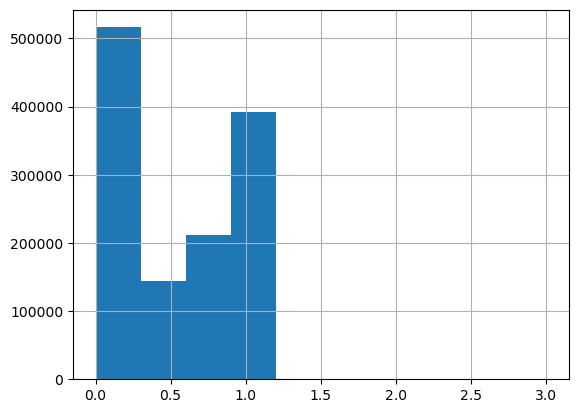

In [40]:
reviews_df["helpfulness_score"].hist()

In [42]:
Review = reviews_df[["Id", "User_id", "review/time", "review/score", "review/text", "helpfulness_score"]]
Review.rename(columns={"Id": "book_id", "User_id": "user_id", "review/time": "time", "review/score": "score", "review/text": "text"}, inplace=True)

Author_Of = book_ai_gi[["Id", "authorid"]].drop_duplicates(ignore_index=True)
Author_Of.rename(columns={"Id": "book_id", "authorid": "author_id"}, inplace=True)

Belong_To = book_ai_gi[~book_ai_gi["id"].isna()][["Id", "id"]].drop_duplicates(ignore_index=True)
Belong_To.rename(columns={"Id": "book_id", "id": "genre_id"},inplace=True)

Write_In = author_gi[~author_gi["id"].isna()][["authorid", "id"]].drop_duplicates(ignore_index=True)
Write_In.rename(columns={"authorid": "author_id", "id":"genre_id"},inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [1]:
print(len(Book))
print(len(Author))
print(len(Genre))
print(len(User))
print(len(Review))
print(len(Author_Of))
print(len(Belong_To))
print(len(Write_In))

NameError: name 'Book' is not defined

# Save cleaned datasets

In [44]:
Book.to_csv("/kaggle/working/Book.csv", index=False)
Author.to_csv("/kaggle/working/Author.csv", index=False)
User.to_csv("/kaggle/working/User.csv", index=False)
Genre.to_csv("/kaggle/working/Genre.csv", index=False)
Review.to_csv("/kaggle/working/Review.csv", index=False)
Author_Of.to_csv("/kaggle/working/Author_Of.csv", index=False)
Belong_To.to_csv("/kaggle/working/Belong_To.csv", index=False)
Write_In.to_csv("/kaggle/working/Write_In.csv", index=False)

In [62]:
len(Author)

35572

In [65]:
Review.columns

Index(['book_id', 'user_id', 'time', 'review/score', 'text',
       'helpfulness_score'],
      dtype='object')

In [61]:
print(Book[Book["book_id"]=="0553025252"]["title"])

53347    'They'Ve Killed the President!': The Search fo...
Name: title, dtype: object


# EDA on original datasets

In [9]:
books["ratingsCount"].describe()

count    49752.000000
mean        21.252975
std        201.340431
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       4895.000000
Name: ratingsCount, dtype: float64

In [4]:
reviews["review/score"].describe()

count    3.000000e+06
mean     4.215289e+00
std      1.203054e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: review/score, dtype: float64

Text(0, 0.5, 'Number of reviews')

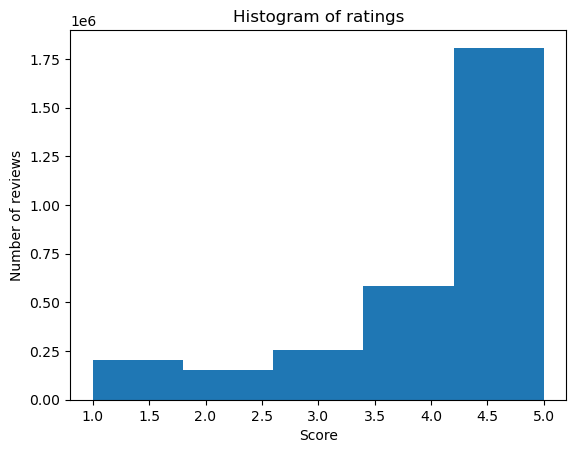

In [61]:
ax = reviews["review/score"].hist(bins=5, grid=False)
ax.set_title("Histogram of ratings")
ax.set_xlabel("Score")
ax.set_ylabel("Number of reviews")

In [11]:
books["publishedDate"][0]

'1996'

In [19]:
def convert_to_year(date):
    try:
        year = int(date[:4])
        return year
    except:
        return 0

In [24]:
years = books["publishedDate"].fillna("0000")
years = years.apply(lambda x: convert_to_year(x))
np.unique(years)

array([   0, 1016, 1526, 1577, 1580, 1581, 1598, 1616, 1617, 1619, 1626,
       1628, 1637, 1640, 1651, 1652, 1653, 1654, 1659, 1661, 1662, 1663,
       1665, 1668, 1670, 1671, 1672, 1674, 1675, 1679, 1680, 1681, 1682,
       1684, 1687, 1690, 1693, 1695, 1696, 1699, 1700, 1701, 1703, 1705,
       1710, 1711, 1712, 1720, 1721, 1722, 1723, 1727, 1728, 1730, 1731,
       1732, 1733, 1734, 1735, 1737, 1738, 1739, 1740, 1741, 1742, 1745,
       1746, 1748, 1749, 1750, 1751, 1753, 1754, 1755, 1756, 1758, 1760,
       1762, 1763, 1765, 1766, 1767, 1768, 1770, 1772, 1773, 1774, 1775,
       1776, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787,
       1788, 1789, 1791, 1792, 1793, 1794, 1795, 1797, 1798, 1799, 1800,
       1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811,
       1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822,
       1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833,
       1834, 1835, 1836, 1837, 1838, 1839, 1840, 18

In [27]:
reviews.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [34]:
reviews[reviews["review/helpfulness"]=='0/2'].head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
20,0595344550,Whispers of the Wicked Saints,10.95,A2GKUH6OBW7POH,julee glee,0/2,5.0,1118102400,Awesome !,This was not a typical romance read. It is dee...
80,0908968000,Gold and greenstone,NaN,A3Q7EWPN8MK8MS,Rob,0/2,5.0,948585600,&quot;Gold and Greenstone&quot; Barry Crump,A great New Zealand book writen in the true Ba...
216,076192177X,The Handbook of Community Practice,NaN,A2T39WC4SVQ3NQ,K. T. Pehrson,0/2,4.0,1254009600,textbook,Book shipped quickly and was in excellent cond...
394,0671551345,Night World: Daughters Of Darkness,NaN,A1V0SFB3AXM8JK,"K. Davis ""The Rose Bride""",0/2,1.0,1177718400,Disappointing to say the least,"This book is probably, in my opinion, one of (..."
541,0812521765,Death Dream,NaN,A3AY3EV2MFRFGG,"Chadwick H. Saxelid ""Bookworm""",0/2,4.0,1014854400,Dream Warriors must close door opened to night...,A young boy becomes the portal for a ferocious...


In [36]:
reviews["review/text"][394]

"This book is probably, in my opinion, one of (if not THE) worst in the Night World Series. It is Ash's story this time, who's soulmate just happens to be a human. (which Ironically was shadowed upon in the first book, 'Secret Vampire'.) Ash's character was cool, charismatic....and totally wasted in this book. Mary Lynnette was too self riteous, too...I don't know. To me, she didn't come off as the strong female lead she was supposed to. Instead, I found myself annoyed at her several times throughout the book. She was presumptuous, she was always assuming things, and she was rather stereotypic if you ask me. I think someone like Maggy from 'Black Dawn', or even someone like Hanna or Gillian from 'Soulmate' and 'Dark Angel' would have been a better match for Ash, not this smart alec, holier than thou woman named Mary Lynnette.The book itself was lacking as well. We pretty much learn nothing about the nightworld, it doesn't much progress the series except to mention a few characters that

In [37]:
# Get genres
genres = books["categories"].fillna("[]")
genres = genres.apply(lambda x: x.strip("']['").split(' & '))
genres = genres.explode(ignore_index=True)

In [38]:
nan_idx = genres[genres==''].index
genres.drop(nan_idx, inplace=True)

In [39]:
top10_genres = genres.value_counts()[:10]
top10_genres

Fiction             23419
Religion             9459
History              9330
Juvenile Fiction     6643
Biography            6386
Autobiography        6331
Economics            5694
Business             5690
Computers            4312
Social Science       3834
Name: categories, dtype: int64

In [40]:
top10_genres.index

Index(['Fiction', 'Religion', 'History', 'Juvenile Fiction', 'Biography',
       'Autobiography', 'Economics', 'Business', 'Computers',
       'Social Science'],
      dtype='object')

Text(0.5, 0, 'Number of books')

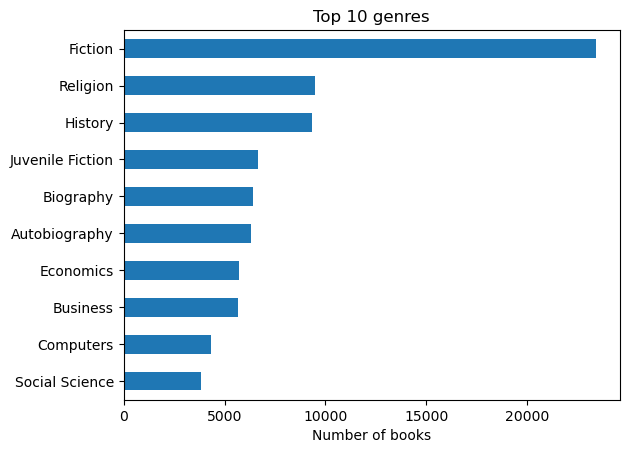

In [62]:
ax = top10_genres.plot.barh(title="Top 10 genres")
ax.invert_yaxis()
ax.set_xlabel("Number of books")

Text(0.5, 0, 'Average rating')

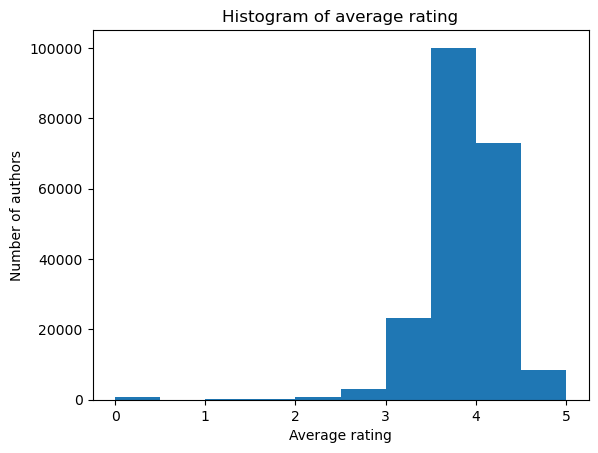

In [72]:
ax = authors["average_rate"].replace(8.07, 8.07/2).hist(bins=10, grid=False)
ax.set_title("Histogram of average rating")
ax.set_ylabel("Number of authors")
ax.set_xlabel("Average rating")

In [68]:
new_average_rate = authors["average_rate"].replace(8.07, 8.07/2)

<AxesSubplot:>

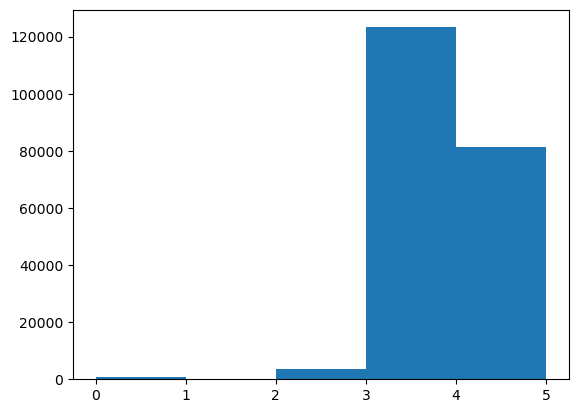

In [69]:
new_average_rate.hist(bins=5, grid=False)